# Crime analysis assignment

Your job for this assignment is pretty wide open. Just take the `campus_crime.csv` file included in this directory and use some analysis tools from Pandas and Seaborn to explore it. There is no right answer here. Just use the tools we've discussed to look through the data and come up with **three story ideas**.

Your assignment should be checked in to your Github repository in the form of a Jupyter notebook. To give you a little extra time, it is due **Monday, Dec. 11** (the first day of Finals week).

To get you started, I've included a sample of some code you can use below.

## Example

You might just want to start by copying this setup and import code.

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
data = pd.read_csv('campus_crime.csv')

# Example of some printed data, to verify the import worked
data[:1]

,instname,total_enr,murder,manslaughter,forcible,nonforce,robbery,agg_aslt,burglary,vehicle,arson
0,American River College,95250,0,0,1,2,3,2,6,8,0


It might be useful to be able to sort by column, to figure out, say, where the campuses with the most murders are. We're passing the argument `ascending=False` here to sort in descending order, largest to smallest. And the syntax `[:10]` does the same thing it would in a list: gets the first 10 items (in this case rows).

In [36]:
data.sort_values('murder', ascending=False)[:10]

,instname,total_enr,murder,manslaughter,forcible,nonforce,robbery,agg_aslt,burglary,vehicle,arson
133,San Jose State University,60472,2,0,3,0,2,13,24,13,4
164,University of Arizona,39236,1,0,3,0,0,0,43,6,2
219,Virginia Polytechnic Institute and State Unive...,371232,1,0,14,0,0,3,30,3,0
183,University of Illinois at Chicago,84273,1,0,9,0,6,8,14,0,0
0,American River College,95250,0,0,1,2,3,2,6,8,0
155,The University of Texas at El Paso,22640,0,0,5,0,1,3,28,21,0
145,Tarrant County College District,300372,0,0,0,0,0,1,1,8,0
146,Temple University,294840,0,0,4,0,4,4,5,0,0
147,Texas A & M University-College Station,100460,0,0,3,0,1,0,29,3,1
148,Texas State University-San Marcos,68174,0,0,3,0,1,5,44,3,1


It might also be helpful to search for Mizzou. There are a lot of ways to do this, but this is probably the simplest:

In [37]:
data[data.instname == 'University of Missouri-Columbia']

,instname,total_enr,murder,manslaughter,forcible,nonforce,robbery,agg_aslt,burglary,vehicle,arson
195,University of Missouri-Columbia,33762,0,0,11,0,1,8,10,1,1


We could also use Seaborn to try some visualizations. For example, do campuses with high enrollment tend to have more total crime reports? # First we can create a new column called `total_count` that adds up all the total reports for a school

In [41]:
data["total_count"] = data["murder"] + data["manslaughter"] + data["forcible"]\
  + data["nonforce"] + data["robbery"] + data["agg_aslt"] + data["burglary"]\
  + data['vehicle'] + data["arson"]


data[:5]

,instname,total_enr,murder,manslaughter,forcible,nonforce,robbery,agg_aslt,burglary,vehicle,arson,total_count
0,American River College,95250,0,0,1,2,3,2,6,8,0,22
1,Arizona State University,289016,0,0,17,1,11,27,90,17,11,174
2,Ashford University,74596,0,0,2,0,0,0,1,0,0,3
3,Auburn University,25469,0,0,1,0,2,0,22,3,0,28
4,Austin Community College District,1082400,0,0,0,0,0,1,2,0,0,3


Then we can see on a graph how it relates to total enrollment. Note that I literally copied this from the class example and just removed a couple arguments to make it simpler:

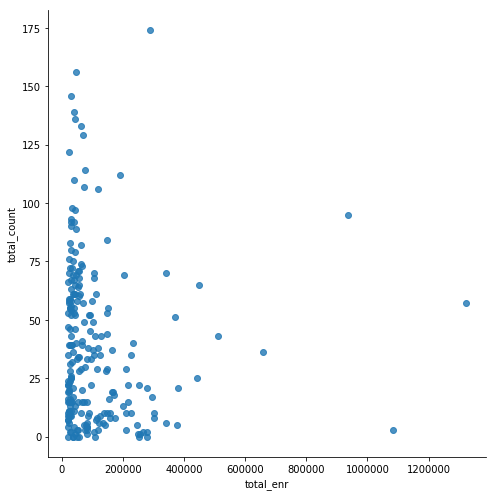

In [25]:
# Highlight Pinellas with facetgrid
g = sns.FacetGrid(data, size=7)

g.map(plt.scatter, "total_enr", "total_count", alpha=.8)

Doesn't seem like there's much of a relationship, but it's kind of hard to tell because a few schools with preposterously high enrollments are skewing the visualization. Let's just look at schools with an enrollment of 50,000 or less to see how the graph looks then.

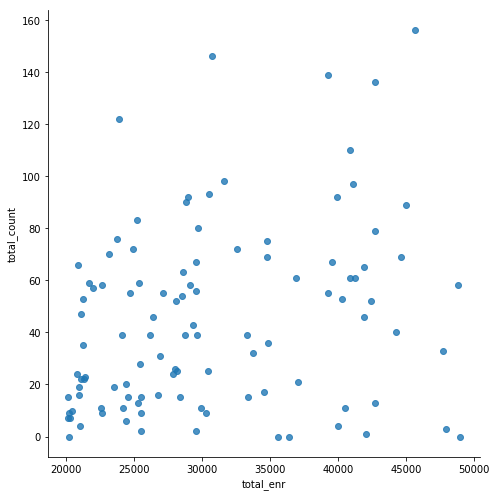

In [26]:
smaller_data = data[data.total_enr < 50000]

# Highlight Pinellas with facetgrid
g = sns.FacetGrid(smaller_data, size=7)

g.map(plt.scatter, "total_enr", "total_count", alpha=.8)

Looks like a little bit clearer, but the relationship doesn't seem too positive. Although there seem to be a number of schools that reported around 0 incidents even though they have large enrollments. Are they not reporting properly? That might be a story of its own. Here's a list of every school with at least 10,000 students and fewer than 5 reported incidents:

In [39]:
data[(data.total_enr >= 10000) & (data.total_count < 5)].sort_values('total_count')

,instname,total_enr,murder,manslaughter,forcible,nonforce,robbery,agg_aslt,burglary,vehicle,arson,total_count
220,Walden University,48982,0,0,0,0,0,0,0,0,0,0
77,Kaplan University-Davenport Campus,56606,0,0,0,0,0,0,0,0,0,0
47,Excelsior College,35608,0,0,0,0,0,0,0,0,0,0
122,Rio Salado College,251090,0,0,0,0,0,0,0,0,0,0
38,DeVry University-Illinois,279210,0,0,0,0,0,0,0,0,0,0
16,Capella University,36375,0,0,0,0,0,0,0,0,0,0
157,Thomas Edison State College,20251,0,0,0,0,0,0,0,0,0,0
143,Suffolk County Community College,107148,0,0,0,0,0,0,0,0,0,0
27,Columbus State Community College,247368,0,0,0,0,0,0,1,0,0,1
19,Central Texas College,80985,0,0,0,0,0,1,0,0,0,1


And finally, massive pair grids are always a fun way to see how a bunch of variables relate. So here's one for this dataset:

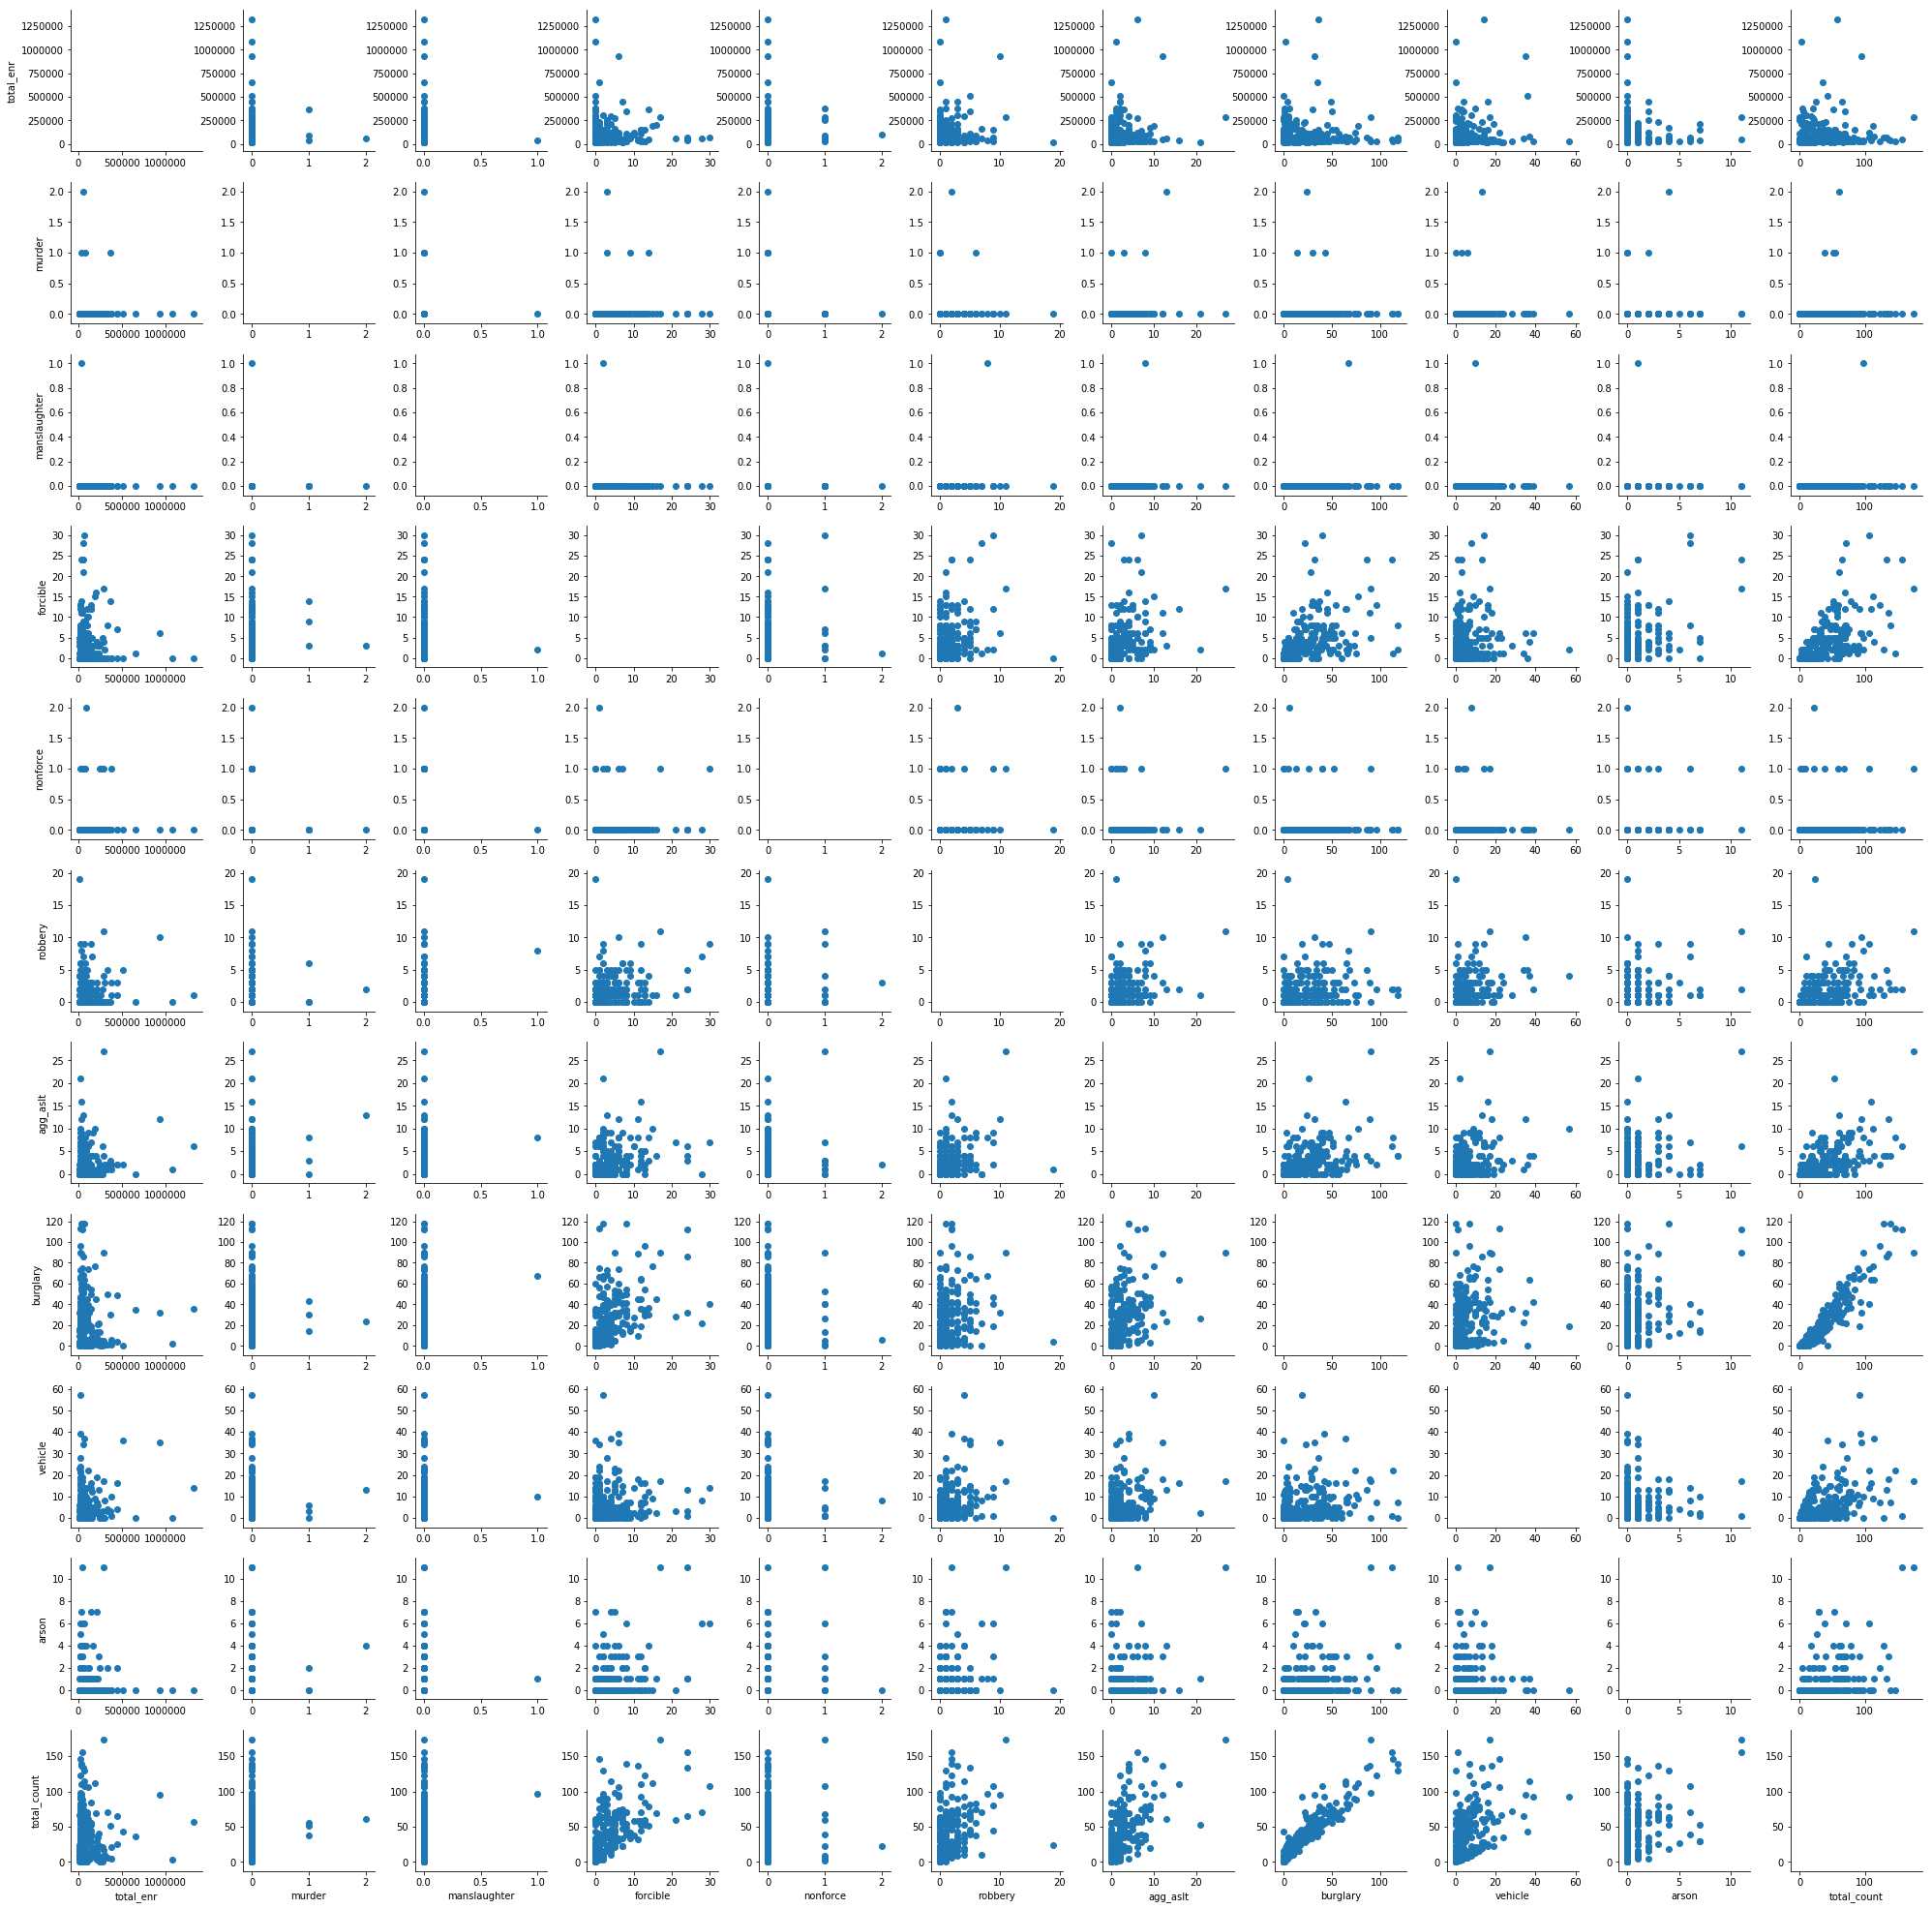

In [40]:
g = sns.PairGrid(data)
g.map_offdiag(plt.scatter);

Lots of interesting seeds for story ideas in there.

## Other notes

Again, there is no right answer here. There is no requirement for how long or involved the analysis has to be. You could even use my work above as a starting point.

Just use this an an excuse to explore tools like [Pandas](http://pandas.pydata.org/) and [Seaborn](https://seaborn.pydata.org/), or check out other analysis tools ([agate](https://agate.readthedocs.io/en/1.6.0/), [ggplot](http://ggplot.yhathq.com)) that you might find interesting.

Look at examples, use Google and explore the documentation for each of these tools. Or if there's something you can't figure out how to do, just ask me!

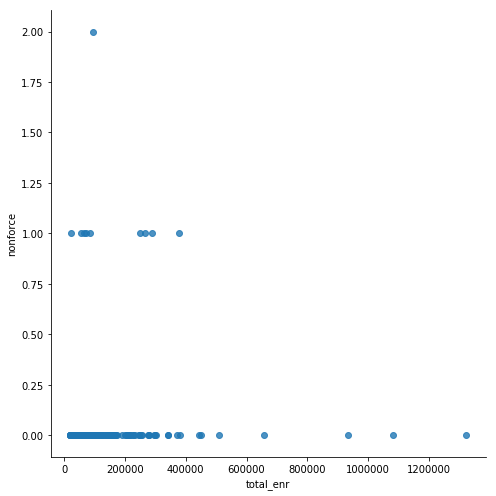

In [43]:
g = sns.FacetGrid(data, size=7)

g.map(plt.scatter, "total_enr", "nonforce", alpha=.8)

In [44]:
data.sort_values('nonforce', ascending=False)[:10]

,instname,total_enr,murder,manslaughter,forcible,nonforce,robbery,agg_aslt,burglary,vehicle,arson,total_count
0,American River College,95250,0,0,1,2,3,2,6,8,0,22
82,Lone Star College System,378174,0,0,0,1,1,1,1,1,0,5
178,University of Delaware,64467,0,0,3,1,4,3,26,1,1,39
172,University of California-Santa Barbara,21685,0,0,7,1,1,3,40,4,3,59
168,University of California-Irvine,54378,0,0,6,1,2,1,52,5,1,68
166,University of California-Berkeley,72274,0,0,30,1,9,7,40,14,6,107
141,St Petersburg College,265024,0,0,0,1,0,0,0,1,0,2
1,Arizona State University,289016,0,0,17,1,11,27,90,17,11,174
105,Nova Southeastern University,85371,0,0,2,1,0,0,5,1,0,9
227,Western Michigan University,250860,0,0,3,1,0,2,13,1,2,22


In [45]:
data.sort_values('forcible', ascending=False)[:10]

,instname,total_enr,murder,manslaughter,forcible,nonforce,robbery,agg_aslt,burglary,vehicle,arson,total_count
166,University of California-Berkeley,72274,0,0,30,1,9,7,40,14,6,107
107,Ohio State University-Main Campus,56867,0,0,28,0,7,0,22,8,6,71
167,University of California-Davis,63464,0,0,24,0,5,4,86,13,1,133
213,University of Wisconsin-Madison,41946,0,0,24,0,2,3,32,3,1,65
116,Pennsylvania State University-Main Campus,45628,0,0,24,0,2,6,112,1,11,156
65,Harvard University,54784,0,0,21,0,1,7,28,3,0,60
1,Arizona State University,289016,0,0,17,1,11,27,90,17,11,174
56,George Washington University,202080,0,0,16,0,1,4,45,2,1,69
91,Michigan State University,191300,0,0,15,0,1,10,77,9,0,112
219,Virginia Polytechnic Institute and State Unive...,371232,1,0,14,0,0,3,30,3,0,51


In [47]:
data[(data.total_enr >= 10000) & (data.total_count < 5)].sort_values('forcible')

,instname,total_enr,murder,manslaughter,forcible,nonforce,robbery,agg_aslt,burglary,vehicle,arson,total_count
74,Johns Hopkins University,209960,0,0,0,0,0,0,1,2,0,3
157,Thomas Edison State College,20251,0,0,0,0,0,0,0,0,0,0
143,Suffolk County Community College,107148,0,0,0,0,0,0,0,0,0,0
141,St Petersburg College,265024,0,0,0,1,0,0,0,1,0,2
138,South Texas College,29604,0,0,0,0,0,2,0,0,0,2
137,Sinclair Community College,105530,0,0,0,0,0,0,2,0,0,2
122,Rio Salado College,251090,0,0,0,0,0,0,0,0,0,0
121,Richland College,40000,0,0,0,0,0,1,0,2,1,4
113,Palm Beach State College,117416,0,0,0,0,0,0,0,3,0,3
87,Macomb Community College,47938,0,0,0,0,0,0,0,3,0,3


 Story Ideas:
-How is the University of Berkeley helping students report forcible rape? It seems unlikely that they have the actual highest rate of rape. Is their number a result of better reporting practices or is it actually the highest in the country?
-This would require more data, but I'm interested in comparing the number of non-forcible sexual assaults/rapes with those in the past. Attacks that fall under this category, if I'm correct, would include sexual attacks with underage and intoxicated individuals. These seem more likely than forcible rape in a college setting and the most reported by one university is two, which seems suspect.
-A lot of universities with over 10,000 students have reported no sexual assault or rape at all, which is ridiculous. Combined, this is well over two million people, and unfortunately, no sexual assualts in a population that large seems improbable, if not impossible. 
